# Programming Assignment 2 Part 1 - Decision Tree

In this programming assignment, you will implement a decision tree model.

*For Even Roll Number Students:*

* In this part, you have to implement a decision tree model to predict the cardio vascular disease based on various input features.
* Noiseless Dataset: ````cardio.csv````
* Noisy Dataset: ````cardio_noise.csv````

*For Odd Roll Number Students:*

* In this part, you have to implement a decision tree model to predict whether a patient has diabetes based on various input features.
* Noiseless Dataset: ````diabetes.csv````
* Noisy Dataset: ````diabetes_noise.csv````

The assignment zip file (ML_CS60050_A2.zip) contains the respective datasets which will be used in this assignment.

You have to write your code in this jupyter notebook. You have to write your code only between ### START CODE HERE ### and ### END CODE HERE ### comments.

### Assignment Submission Instructions

Please submit your assignment as a ZIP file that contains a folder named in the following format: `RollNo_ML_A2`. Inside this folder, include two Jupyter notebooks and a Report with the following names:

1. `RollNo_A2_Part1.ipynb`
2. `RollNo_A2_Part2.ipynb`
3. `RollNo_report.pdf`


Instructions for the Report:
* Summarize results from noiseless and noisy datasets.
* Compare performance and note the impact of noise.
* Conclude with key findings and implications.

Make sure that you replace `RollNo` with your actual roll number in both the folder name and the notebook filenames.

For example, if your roll number is `23CS60R11`, the folder should be named `23CS60R11_ML_A2`, and the three files should be named `23CS60R11_A2_Part1.ipynb`, `23CS60R11_A2_Part2.ipynb` and `RollNo_report.pdf`.

Submit this ZIP file as your assignment submission.

In [34]:
# Install pandas, numpy, seaborn, and matplotlib
! pip install pandas numpy seaborn matplotlib

# Install scikit-learn
! pip install scikit-learn

! apt install libgraphviz-dev
! pip install graphviz
# Install IPython
! pip install ipython

# Install pygraphviz
! pip install pygraphviz



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Please follow the instructions given in the file ````graphviz_installation.txt```` to install graphviz

In [35]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from IPython.display import Image, display
import pygraphviz as pgv
from graphviz import Digraph

In [36]:
df = pd.read_csv('cardio.csv') # Replace with noise/noiseless dataset
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Train, Validation, Test split**

In [37]:
train_df,test_df = train_test_split(df,test_size=0.2,random_state=1)
train_df,val_df = train_test_split(train_df,test_size=0.2,random_state=1)
train_df.shape,test_df.shape,val_df.shape

((6400, 12), (2000, 12), (1600, 12))

In [38]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Model Implementation

# How the algorithm works

**We'll start with all examples at the root node then:**

**We'll calculate information gain for splitting on all possible features and pick the one with the highest value**

**Then we'll split the data according to the selected feature**

**We'll repeat this  process until stopping criteria is met**

## Key Points:

### Entropy
**Entropy function which is a way to measure impurity**

**Entropy is represented by this function**
$$H = -\sum\limits_{}^{} p_{i}\text{log}_2 p_{i}
$$

**Where $(p_1)$ is the fraction of examples that are a certain class**


### Information Gain

**Information gain is the reduction in entropy when he make a split**

**Recall that our goal is to choose the split that gives the highest information gain, information gain equation =**

**$$H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$**
**where**
- $H(p_1^\text{node})$ is entropy at the node
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch respectively



### Decision Tree visualization using graphviz

In [39]:
graph = pgv.AGraph(strict=True, directed=True)
graph2 = pgv.AGraph(strict=True, directed=True)


## Start the Implementation

In [40]:

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class DecisionTree:
    def __init__(self):
        self.root = Node(None)
        self.height = -1

    def find_splits(self, data, column_index):
        """
        Identifies potential split points for a given feature.

        Parameters:
            data (numpy.ndarray): The dataset used for finding splits.
            column_index (int): The index of the column for which to find potential splits.

        Returns:
            potential_splits (list): A list of potential split points for the specified feature.
        """

        x = data[:,:-1]
        potential_splits = []

        ### START CODE HERE ###

        # CODE HERE (REFER LECTURE SLIDES)
        potential_splits = np.unique(x[:,column_index])

        ### END CODE HERE ###

        return potential_splits


    def calculate_entropy(self, data):
        """
        Calculates the entropy of the dataset.

        Parameters:
            data (numpy.ndarray): The dataset for which to calculate entropy.

        Returns:
            entropy (float): The entropy value of the dataset.
        """


        if isinstance(data, pd.DataFrame):
          data = data.values
        y = data[:, -1]
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        ### START CODE HERE ###
        entropy = None # Replace with actual code
        entropy = -np.sum(probabilities * np.log2(probabilities))
        ### END CODE HERE ###
        return entropy

    def calculate_information_gain(self, data, column_no, value):
        """
        Calculates the information gain resulting from splitting the data on a specific feature at a specific value.

        Parameters:
            data (numpy.ndarray): The dataset to split.
            column_no (int): The index of the feature used to split the data.
            value (float): The value at which to split the feature.

        Returns:
            information_gain (float): The information gain from the split.
        """
        parent_entropy = self.calculate_entropy(data)
        left_data = data[data[:, column_no] <= value]
        right_data = data[data[:, column_no] > value]

        n = len(left_data) + len(right_data)
        p_left_data = len(left_data) / n
        p_right_data = len(right_data) / n

        ### START CODE HERE ###
        child_entropy = p_left_data * self.calculate_entropy(left_data) + p_right_data * self.calculate_entropy(right_data)
        information_gain = None  # Replace with actual code
        information_gain = parent_entropy - child_entropy
        ### END CODE HERE ###

        return information_gain

    def majority(self, data):
        """
        Determines the majority class label in the dataset.

        Parameters:
            data (pandas.DataFrame): The dataset to classify.

        Returns:
            majority_class (int): The label of the majority class.
        """
        ### START CODE HERE ###
        cls, count = np.unique(data.iloc[:,-1], return_counts=True) #Replace target with actual target attribute
        ### END CODE HERE ###
        return cls[np.argmax(count)]

    def classify(self, data, edge):
        """
        Classifies a dataset as a leaf node.

        Parameters:
            data (pandas.DataFrame): The dataset to classify.
            edge (int): The index of the parent edge.

        Returns:
            leaf (Node): A leaf node with classification information.
        """
        classification = self.majority(data)
        entropy = self.calculate_entropy(data.values)
        d = {"ID": "Leaf", "Classification": classification, "Parent_Edge": edge, "Entropy": entropy, "Samples": data.shape[0]}
        leaf = Node(d)
        return leaf

    def build_tree(self, data, max_depth, attributes, edge, height):

        """
        A recursive utility function for building the decision tree.

        Parameters:
            data (pandas.DataFrame): The dataset to build the tree from.
            max_depth (int): The maximum allowed depth of the tree.
            attributes (list): The list of attributes used in the dataset.
            edge (int): The index of the parent edge.
            height (int): The current height of the tree.

        Returns:
            node (Node): The root node of the subtree created.
        """
        ### START CODE HERE ###
        if data.empty:
          return None
        if height >=max_depth or len(np.unique(data.iloc[:,-1]))==1:
          return self.classify(data, edge)

            #return leaf

        ### END CODE HERE ###


        best = {"ID": "", "best_attribute": "", "best_gain": -1, "best_split": -1, "best_entropy": -1}


        ### START CODE HERE ###

        for attribute in attributes:
          for value in self.find_splits(data.values, np.argwhere(self.attributes == attribute).squeeze()):
            gain = self.calculate_information_gain(data.values, np.argwhere(self.attributes == attribute).squeeze(), value)
            if gain > best["best_gain"]:
              best["ID"] = "Node"
              best["best_gain"] = gain
              best["best_attribute"] = attribute
              best["best_split"] = value
              best["best_entropy"] = self.calculate_entropy(data.values)


        if best["best_gain"]  <= 0.025:
          return self.classify(data, edge)


        # CODE TO EXTRACT THE BEST ATTRIBUTE AND STORE IT IN best VARIABLE

        ### END HERE ###

        _, sample = np.unique(data["cardio"], return_counts=True)
        d = {"ID": best["best_attribute"], "Entropy": best["best_entropy"],
             "Samples": data.shape[0], "Parent_Edge": edge,
             "Best_Split": best["best_split"], "Values": sample}
        node = Node(d)
        node.left = self.build_tree(data[data[best["best_attribute"]] <= best["best_split"]], max_depth, attributes, 2 * edge + 1, height + 1)
        node.right = self.build_tree(data[data[best["best_attribute"]] > best["best_split"]], max_depth, attributes, 2 * edge + 2, height + 1)

        root = f'{d["ID"]} <= {d["Best_Split"]}\nEntropy = {d["Entropy"]}\nSamples = {d["Samples"]}\nValues = {sample}'

        graph.add_node(str(edge), label=root)
        graph.add_edge(str(edge), str(2 * edge + 1))
        graph.add_edge(str(edge), str(2 * edge + 2))
        return node

    def fit(self, data, max_depth=100):
        """
        Fits the decision tree model to the provided dataset.

        Parameters:
            data (pandas.DataFrame): The dataset to fit the tree to.
            max_depth (int): The maximum allowed depth of the tree.

        Returns:
            None
        """
        attributes = data.columns.tolist()[:-1]
        self.attributes = np.array(attributes)
        self.root = self.build_tree(data, max_depth, attributes, 0, 0)

    def plt(self, graph, node, vert):
        """
        Plots the decision tree using a graph representation.

        Parameters:
            graph (Graph): The graph object to use for plotting.
            node (Node): The current node in the tree.
            vert (int): The current vertex in the graph.

        Returns:
            root (str): The label of the current node.
        """
        d = node.data
        if "Classification" in node.data.keys():
            root = f'{d["ID"]}\nEntropy = {d["Entropy"]}\nSamples = {d["Samples"]}\nClass = {d["Classification"]}'
            graph.add_node(str(vert), label=root)
            return root

        root = f'{d["ID"]} <= {d["Best_Split"]}\nEntropy = {d["Entropy"]}\nSamples = {d["Samples"]}\nValues = {d["Values"]}'
        graph.add_node(str(vert), label=root)
        root1 = self.plt(graph, node.left, 2 * vert + 1)
        graph.add_node(str(2 * vert + 1), label=root1)
        root2 = self.plt(graph, node.right, 2 * vert + 2)
        graph.add_node(str(2 * vert + 2), label=root2)

        graph.add_edge(str(vert), str(2 * vert + 1))
        graph.add_edge(str(vert), str(2 * vert + 2))
        return root

    def prune_util(self, node):
        """
        Utility function for pruning a node in the decision tree.

        Parameters:
            node (Node): The node to prune.

        Returns:
            d (dict): The data for the pruned leaf node.
        """
        d = {"ID": "Leaf", "Classification": 0, "Parent_Edge": node.data["Parent_Edge"],
             "Entropy": 0, "Samples": node.data["Samples"]}
        if node.data["Values"][0] > node.data["Values"][1]:
            d["Classification"] = 0
        else:
            d["Classification"] = 1
        return d

    def prune(self, val_df, node):
        """
        Prunes the decision tree to avoid overfitting.

        Parameters:
            val_df (pandas.DataFrame): The validation dataset used to evaluate pruning.
            node (Node): The current node to consider pruning.

        Returns:
            None
        """
        if "Classification" in node.data.keys():
            return

        ### START CODE HERE ###


        # RECURSIVE CALLS TO IT'S CHILDREN
        if node.left is not None:
          self.prune(val_df, node.left)
        if node.right is not None:
          self.prune(val_df, node.right)

        ### END CODE HERE ###

        curr_val = accuracy_score(val_df.values[:, -1], self.predict(val_df.values[:, :-1]))

        tmp1 = node.left
        tmp2 = node.right
        tmp = node.data
        node.left = None
        node.right = None

        node.data = self.prune_util(node)

        new_val = accuracy_score(val_df.values[:, -1], self.predict(val_df.values[:, :-1]))

        # Decide whether to keep the pruning or revert to the original node

        ### START CODE HERE ###
        if new_val < curr_val:
            node.left = tmp1
            node.right = tmp2
            node.data = tmp

        # Implement the decision logic for keeping or reverting pruning

        ### END CODE HERE ###

    def predict_one(self, data):
        """
        Predicts the class label for a single data point.

        Parameters:
            data (numpy.ndarray): The data point to classify.

        Returns:
            classification (int): The predicted class label.
        """
        node = self.root
        while "Classification" not in node.data.keys():
            d = node.data
            if data[np.argwhere(self.attributes == d["ID"]).squeeze()] <= d["Best_Split"]:
                node = node.left
            else:
                node = node.right
        return node.data["Classification"]

    def predict(self, X):
        """
        Predicts the class labels for a dataset.

        Parameters:
            X (numpy.ndarray): The dataset to classify.

        Returns:
            Y_pred (numpy.ndarray): The predicted class labels.
        """
        ### START CODE HERE ###
        Y_pred= np.array([self.predict_one(x) for x in X])
        return Y_pred
        ### END CODE HERE ###

In [41]:
model = DecisionTree()
model.fit(train_df)
_=model.plt(graph,model.root,0)

### Plotting the Decision Tree before Pruning

In [42]:
graph.draw("Decision_Tree_Before_Pruning.png", prog="dot")


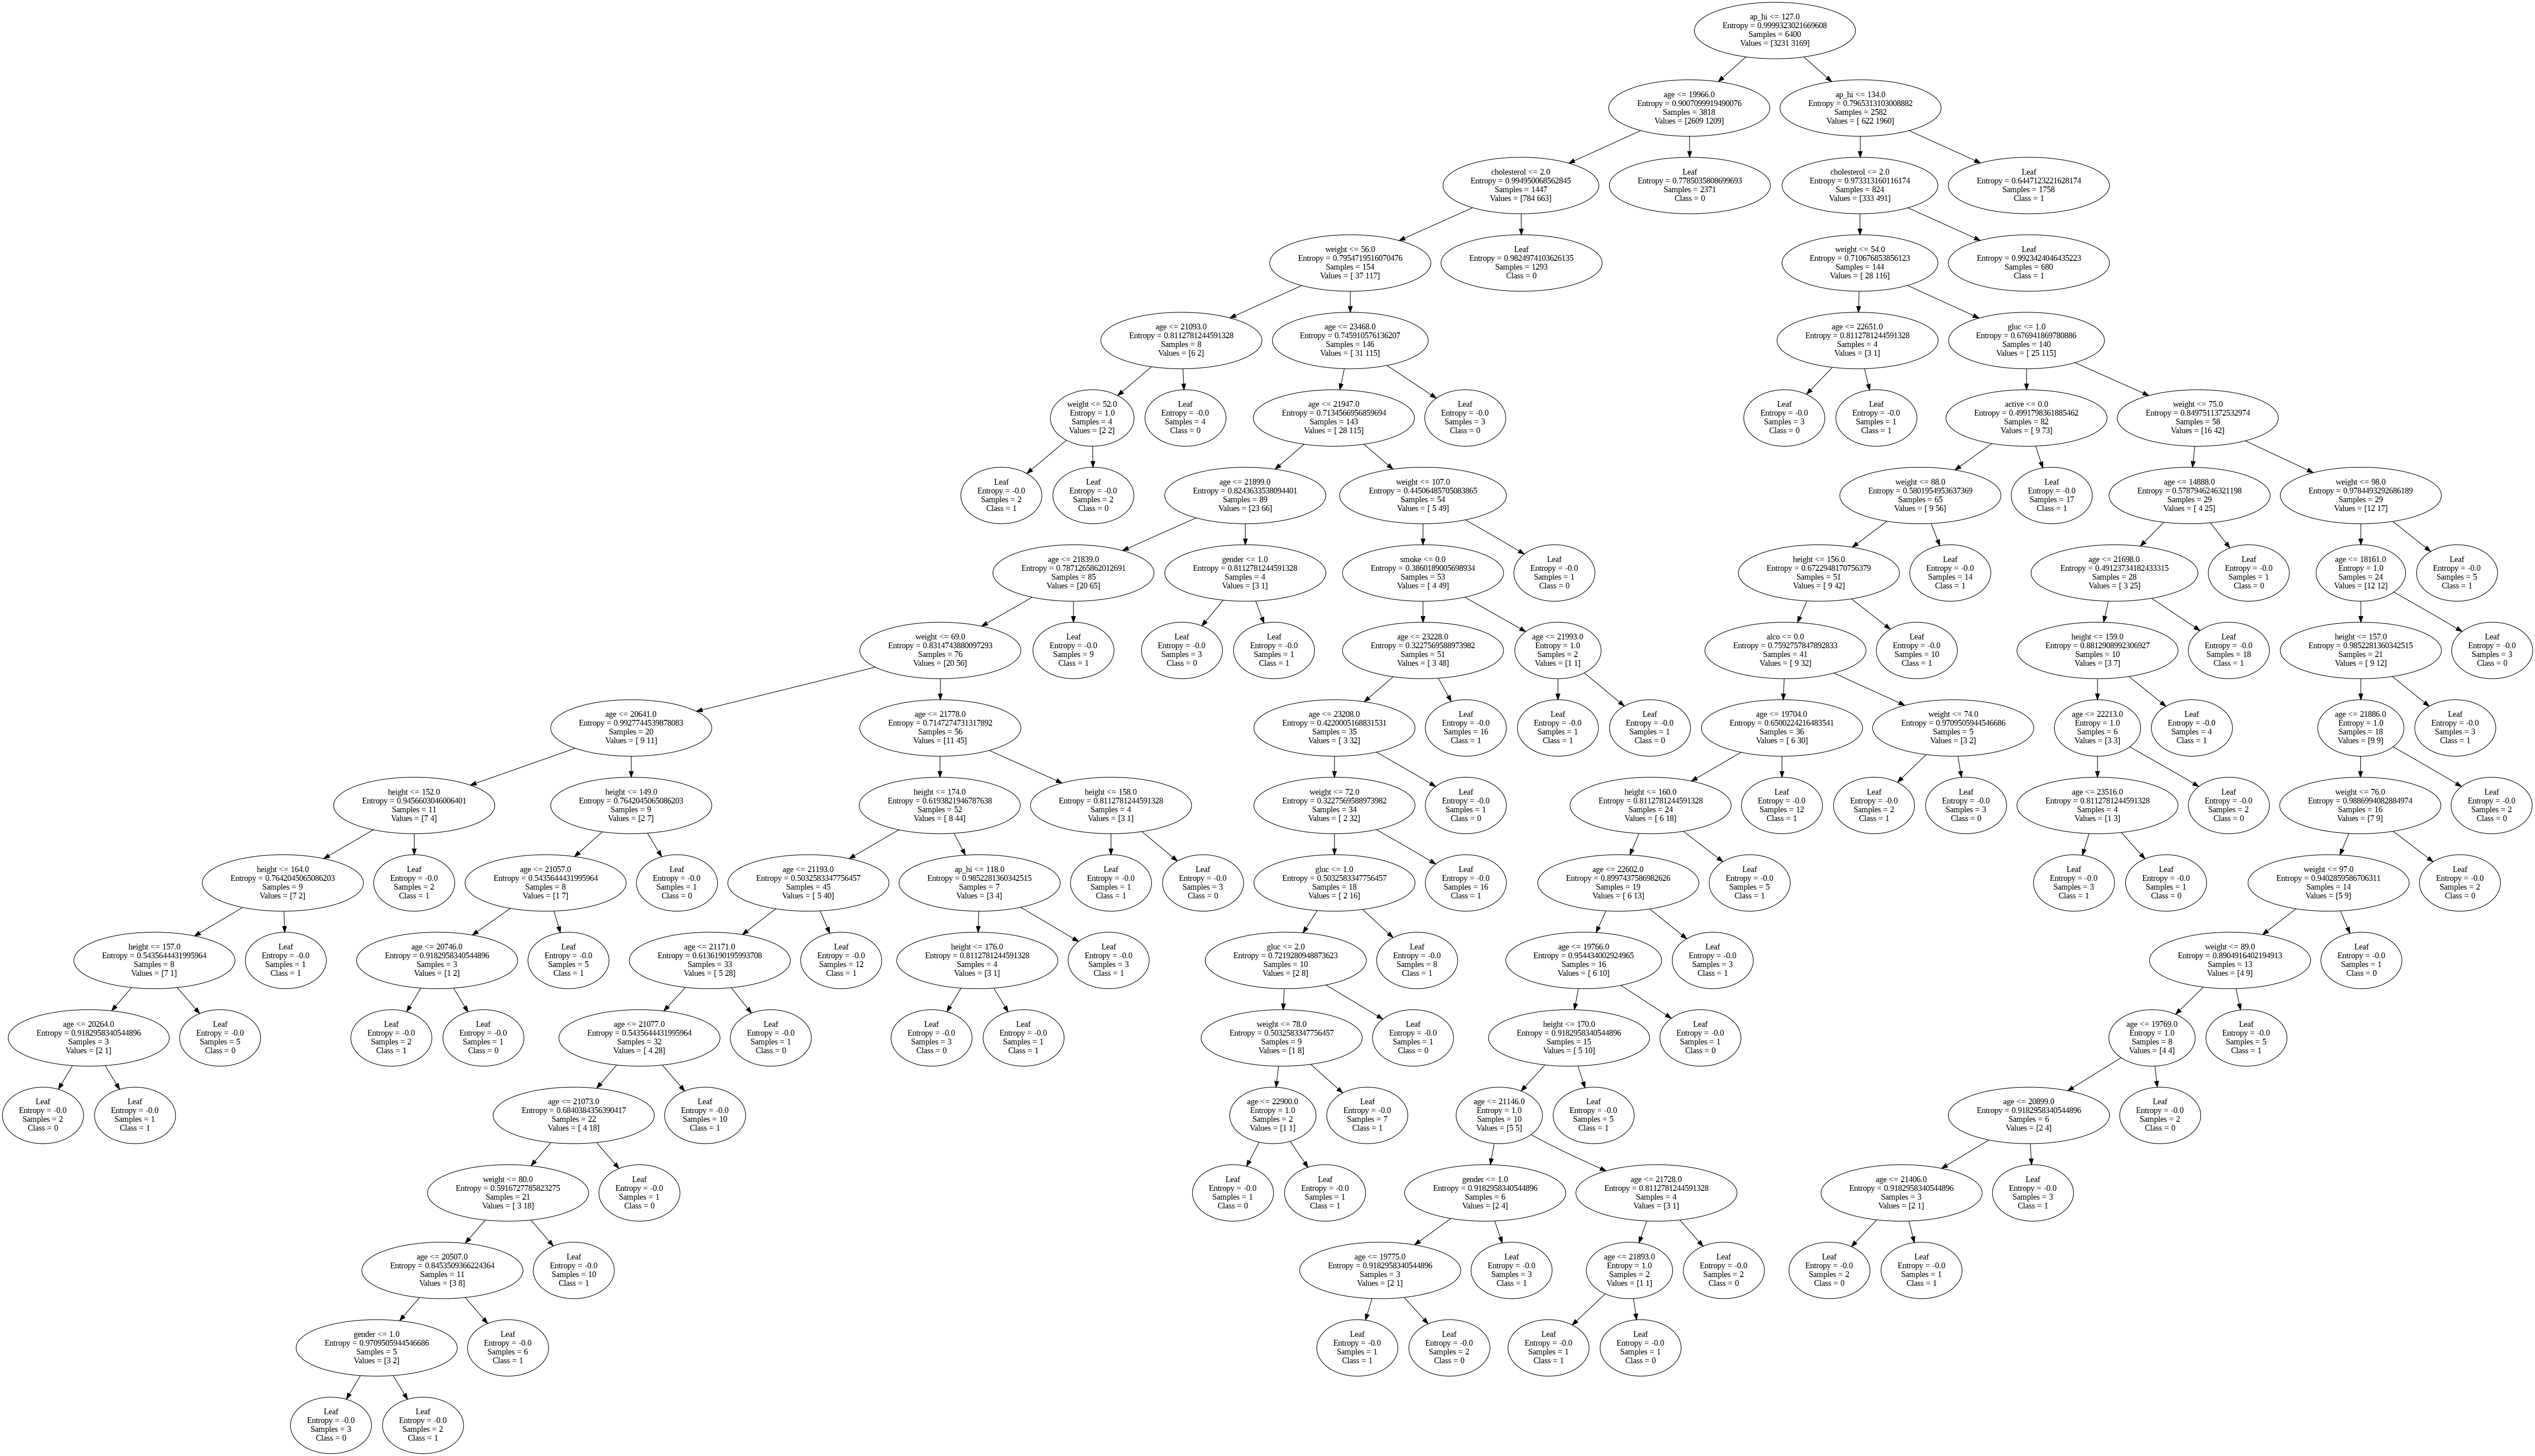

In [43]:
display(Image(filename='Decision_Tree_Before_Pruning.png'))

### Testing before Pruning

In [44]:
X_test = test_df.values[:,:-1]
Y_test = test_df.values[:,-1]

In [45]:
Y_pred = model.predict(X_test)

In [46]:
print("Accuracy,Macro Precision, Macro Recall Before Pruning")
accuracy_score(Y_test,Y_pred)
precision_score(Y_test,Y_pred,average='macro')
recall_score(Y_test,Y_pred,average = 'macro')

Accuracy,Macro Precision, Macro Recall Before Pruning


0.7032105506422204

### Reduced Error Pruning

In [47]:
model.prune(val_df,model.root)

In [48]:
_ =model.plt(graph2,model.root,0)

In [49]:
graph2.draw("Decision_Tree_After_Pruning.png", prog="dot")

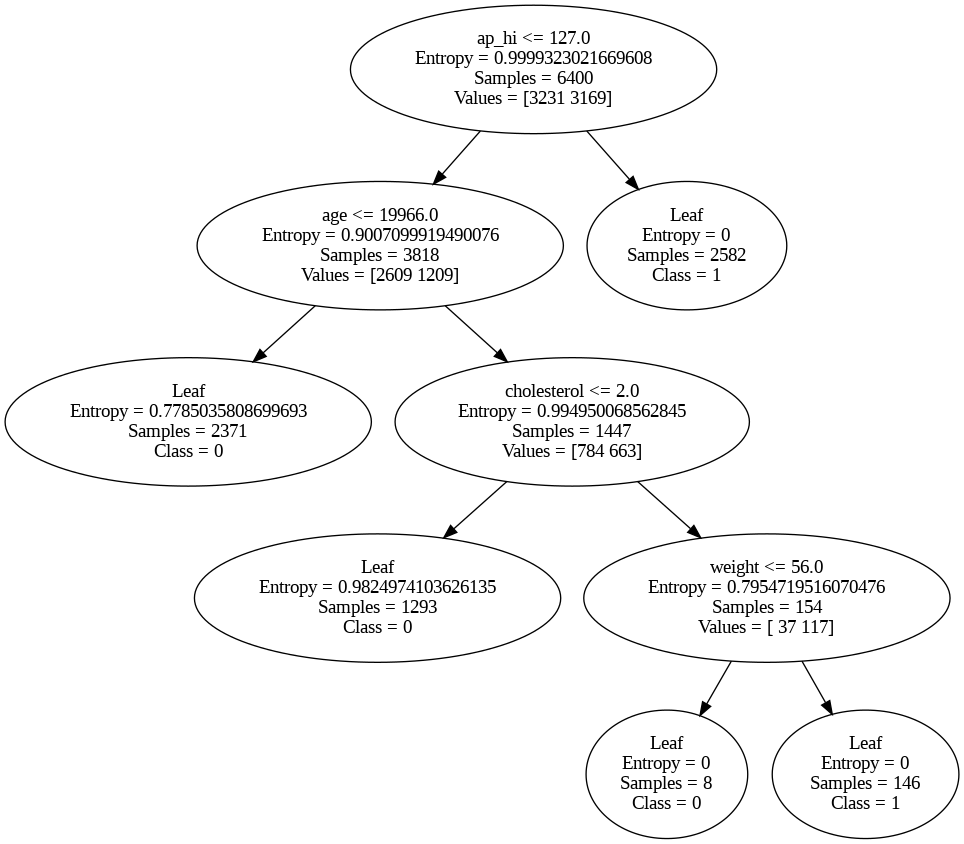

In [50]:
display(Image(filename='Decision_Tree_After_Pruning.png'))

### Testing after Pruning

In [51]:
Y_pred = model.predict(X_test)
print("Accuracy,Macro Precision, Macro Recall After Pruning")
accuracy_score(Y_test,Y_pred),precision_score(Y_test,Y_pred,average='macro'),recall_score(Y_test,Y_pred,average = 'macro')

Accuracy,Macro Precision, Macro Recall After Pruning


(0.7045, 0.71275815278476, 0.7087660003669545)